In [1]:
from Bio import AlignIO
from Bio.Align import AlignInfo 
from multiprocessing import Pool
from Bio import motifs
from Bio.Seq import Seq
import pickle
import numpy as np
import glob
import os 
import pandas as pd
from Bio import SeqIO
import csv
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/home/ubuntu/workspace/AMPsDetector/src')

from pssm import *


In [2]:
data_path="../../datasets/truthset.csv"
AMPs_df=pd.read_csv(data_path,sep=',',header=0)
AMPs_df 

,ID,paper,seq
0,ISGCock_Contig04_0915,PMC4864078,ALQICTRNMIDDRLPYVADNVRPGTFIKQQRKQKQQRHHTSGTRKR...
1,ISGCock_Contig13_4610,PMC4864078,HLYPCKLNLKLGKVPFHFLNLNHKGKSIMVNQQTCLYYIICQTR
2,ISGCock_Contig16_2060,PMC4864078,ISHNHLTAASITHVKNRGKYIYMHLKFRKTNVLI
3,ISGCock_Contig16_4974,PMC4864078,RKKVWFIFHVCPKLKQRILSDTHAKNKCRLSPLLIKSTKIKNET
4,ISGCock_Contig07_3736,PMC4864078,CNYISFFRKCKNSQSTMYGCHRMNKCVFSSY
...,...,...,...
57,TR42258|c1_g1_i1,hal-02965337,MRYIVCFVFFLFFFLLFLWLVPARTASSFLTPRLSSLGKRSWAV
58,TR27534|c0_g1_i1,hal-02965337,MLFKVIIVIWISVCRECTRGGFCNFMHLKPISRELRRELYGRTRRRRK
59,P3,S2162-2531(20)30132-3,FWELWKFLKSLWSIFPRRRP
60,P10,S2162-2531(20)30132-3,ICTTLNWMVKLTCLTHVTLTTRWC


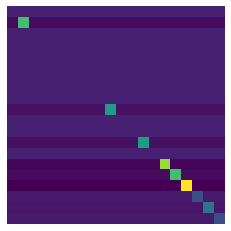

In [3]:
# ready_df = pd.DataFrame(columns = ['ID', 'Sequence','reps', 'length'])
ready_df = AMPs_df.copy()
_flat = []
for i, row in AMPs_df.iterrows():
    
    m = motifs.create( [row['seq']], alphabet="ACDEFGHIKLMNPQRSTVWY")
    index_pattern = [char for char in m.consensus] 
    
    file_name = '../../datasets/truthset/images/'+row['ID']+'.png'
    
    pssm = get_pssm(m)
    result_df = convert_to20X20_(pssm , index_pattern)
    result_df = scale_by(result0_df/len(m.consensus))
    create_image(result_df,file_name) 
            
    flat = result_df.values.flatten()
    _flat.append(flat)
    
ready_df['reps'] = _flat

In [4]:
ready_df

,ID,paper,seq,reps
0,ISGCock_Contig04_0915,PMC4864078,ALQICTRNMIDDRLPYVADNVRPGTFIKQQRKQKQQRHHTSGTRKR...,"[0.5217362915633222, 0.4979000123479128, 0.497..."
1,ISGCock_Contig13_4610,PMC4864078,HLYPCKLNLKLGKVPFHFLNLNHKGKSIMVNQQTCLYYIICQTR,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ..."
2,ISGCock_Contig16_2060,PMC4864078,ISHNHLTAASITHVKNRGKYIYMHLKFRKTNVLI,"[0.5213106112663236, 0.4979411881063055, 0.497..."
3,ISGCock_Contig16_4974,PMC4864078,RKKVWFIFHVCPKLKQRILSDTHAKNKCRLSPLLIKSTKIKNET,"[0.5082378908465902, 0.4992045461256411, 0.499..."
4,ISGCock_Contig07_3736,PMC4864078,CNYISFFRKCKNSQSTMYGCHRMNKCVFSSY,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ..."
...,...,...,...,...
57,TR42258|c1_g1_i1,hal-02965337,MRYIVCFVFFLFFFLLFLWLVPARTASSFLTPRLSSLGKRSWAV,"[0.5246957976014336, 0.4976136544830712, 0.497..."
58,TR27534|c0_g1_i1,hal-02965337,MLFKVIIVIWISVCRECTRGGFCNFMHLKPISRELRRELYGRTRRRRK,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ..."
59,P3,S2162-2531(20)30132-3,FWELWKFLKSLWSIFPRRRP,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ..."
60,P10,S2162-2531(20)30132-3,ICTTLNWMVKLTCLTHVTLTTRWC,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ..."


In [6]:
output = open("../../datasets/truthset/pssm/AMPs.truthset.reps.pkl", 'wb')
pickle.dump(ready_df, output)
output.close()

In [ ]:
##